In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import os
import pickle
import math

In [2]:
pd.options.display.max_columns=100
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('fbref_data/top_league_matches(2000-2023).csv')

C:\Users\berid\AppData\Local\Temp\ipykernel_8004\1290146240.py:1: DtypeWarning: Columns (2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('fbref_data/top_league_matches(2000-2023).csv')


In [4]:
df

,Season,Date,Time,Comp,Round,Day,Venue,Result,Team,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,xG,xGA
0,2000-2001,2000-08-20,NaN,Premier League,Matchweek 1,Sun,Home,W,Manchester Utd,2,0,Newcastle Utd,NaN,NaN,NaN,NaN,Stephen Lodge,Match Report,NaN,NaN,NaN
1,2000-2001,2000-08-22,NaN,Premier League,Matchweek 2,Tue,Away,D,Manchester Utd,1,1,Ipswich Town,NaN,NaN,NaN,NaN,Jeff Winter,Match Report,NaN,NaN,NaN
2,2000-2001,2000-08-26,NaN,Premier League,Matchweek 3,Sat,Away,D,Manchester Utd,2,2,West Ham,NaN,NaN,NaN,NaN,Dermot Gallagher,Match Report,NaN,NaN,NaN
3,2000-2001,2000-09-05,NaN,Premier League,Matchweek 4,Tue,Home,W,Manchester Utd,6,0,Bradford City,NaN,NaN,NaN,NaN,Rob Harris,Match Report,NaN,NaN,NaN
4,2000-2001,2000-09-09,NaN,Premier League,Matchweek 5,Sat,Home,W,Manchester Utd,3,0,Sunderland,NaN,NaN,NaN,NaN,Neale Barry,Match Report,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123653,2022-2023,2023-04-30,15:30,Primeira Liga,Matchweek 30,Sun,Away,NaN,Santa Clara,NaN,NaN,Estoril,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN
123654,2022-2023,2023-05-07,NaN,Primeira Liga,Matchweek 31,Sun,Home,NaN,Santa Clara,NaN,NaN,Gil Vicente FC,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN
123655,2022-2023,2023-05-14,NaN,Primeira Liga,Matchweek 32,Sun,Away,NaN,Santa Clara,NaN,NaN,Braga,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN
123656,2022-2023,2023-05-21,NaN,Primeira Liga,Matchweek 33,Sun,Home,NaN,Santa Clara,NaN,NaN,Portimonense,NaN,NaN,NaN,NaN,NaN,Head-to-Head,NaN,NaN,NaN


# Data Cleaning 

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df['Comp'].unique()

array(['Premier League', 'Champions Lg', 'UEFA Cup', 'Bundesliga',
       'La Liga', 'Division 1', 'Serie A', 'Eredivisie', 'Primeira Liga',
       'Ligue 1', 'Europa Lg', 'League Cup', 'FA Cup', 'DFL-Supercup',
       'DFB-Pokal', 'Rel/Pro Play-offs', 'Copa del Rey', 'Super Cup',
       'Trophée des Champions', 'Coupe de la Ligue', 'Coupe de France',
       'Supercoppa Italiana', 'Coppa Italia', 'Community Shield',
       'Supercopa de España', 'EFL Cup', 'Conf Lg'], dtype=object)

In [7]:
leagues=['Premier League','Bundesliga','La Liga','Serie A','Eredivisie','Primeira Liga','Ligue 1']
df=df[df['Comp'].isin(leagues)].reset_index(drop=True) #removing cup competitions and UEFA competitions

df=df.dropna(subset=['GF','GA']).reset_index(drop=True) #removing matches, that have not been taken place yet
df=df[df['GF'].str.contains(' ',regex=True)==False] #removing matches that ended with penalties

In [8]:
df['GF']=df['GF'].astype(float).astype(int)
df['GA']=df['GA'].astype(float).astype(int)

In [9]:
df

,Season,Date,Time,Comp,Round,Day,Venue,Result,Team,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,xG,xGA
0,2000-2001,2000-08-20,NaN,Premier League,Matchweek 1,Sun,Home,W,Manchester Utd,2,0,Newcastle Utd,NaN,NaN,NaN,NaN,Stephen Lodge,Match Report,NaN,NaN,NaN
1,2000-2001,2000-08-22,NaN,Premier League,Matchweek 2,Tue,Away,D,Manchester Utd,1,1,Ipswich Town,NaN,NaN,NaN,NaN,Jeff Winter,Match Report,NaN,NaN,NaN
2,2000-2001,2000-08-26,NaN,Premier League,Matchweek 3,Sat,Away,D,Manchester Utd,2,2,West Ham,NaN,NaN,NaN,NaN,Dermot Gallagher,Match Report,NaN,NaN,NaN
3,2000-2001,2000-09-05,NaN,Premier League,Matchweek 4,Tue,Home,W,Manchester Utd,6,0,Bradford City,NaN,NaN,NaN,NaN,Rob Harris,Match Report,NaN,NaN,NaN
4,2000-2001,2000-09-09,NaN,Premier League,Matchweek 5,Sat,Home,W,Manchester Utd,3,0,Sunderland,NaN,NaN,NaN,NaN,Neale Barry,Match Report,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107767,2022-2023,2023-03-11,15:30,Primeira Liga,Matchweek 24,Sat,Away,L,Santa Clara,0,1,Paços,40.0,3635.0,Paulo Henrique Rodrigues Cabral,5-4-1,António Nobre,Match Report,NaN,0.7,1.7
107768,2022-2023,2023-03-17,19:15,Primeira Liga,Matchweek 25,Fri,Home,L,Santa Clara,0,2,Rio Ave,40.0,912.0,Ygor Nogueira,3-4-3,Gustavo Correia,Match Report,NaN,0.7,2.1
107769,2022-2023,2023-04-01,20:30,Primeira Liga,Matchweek 26,Sat,Away,L,Santa Clara,0,3,Sporting CP,29.0,31603.0,Pierre Sagna,4-4-2,André Narciso,Match Report,NaN,0.6,2.2
107770,2022-2023,2023-04-07,14:30,Primeira Liga,Matchweek 27,Fri,Home,L,Santa Clara,0,1,Vizela,57.0,802.0,Pierre Sagna,4-2-3-1,João António Gonçalves,Match Report,NaN,0.7,0.8


### For Each League Find the Team with the Highest Win Percentage

In [10]:
wins=df[df['Result']=='W'].groupby(['Comp','Team'])['Team'].count()
matches=df.groupby(['Comp','Team'])['Team'].count()

merged=wins.to_frame().merge(matches.to_frame(),left_index=True,right_index=True)
merged['WinPercentage']=merged['Team_x']/merged['Team_y']


merged.sort_values(['Comp','WinPercentage'],ascending=[True,False])\
.groupby('Comp').head(1)['WinPercentage'].to_frame()

# Leagues and their best team with the highest win percentage

,,WinPercentage
Comp,Team,
Bundesliga,Bayern Munich,0.680412
Eredivisie,Ajax,0.683594
La Liga,Real Madrid,0.667052
Ligue 1,Paris S-G,0.564103
Premier League,Manchester Utd,0.606236
Primeira Liga,Porto,0.731183
Serie A,Juventus,0.640394


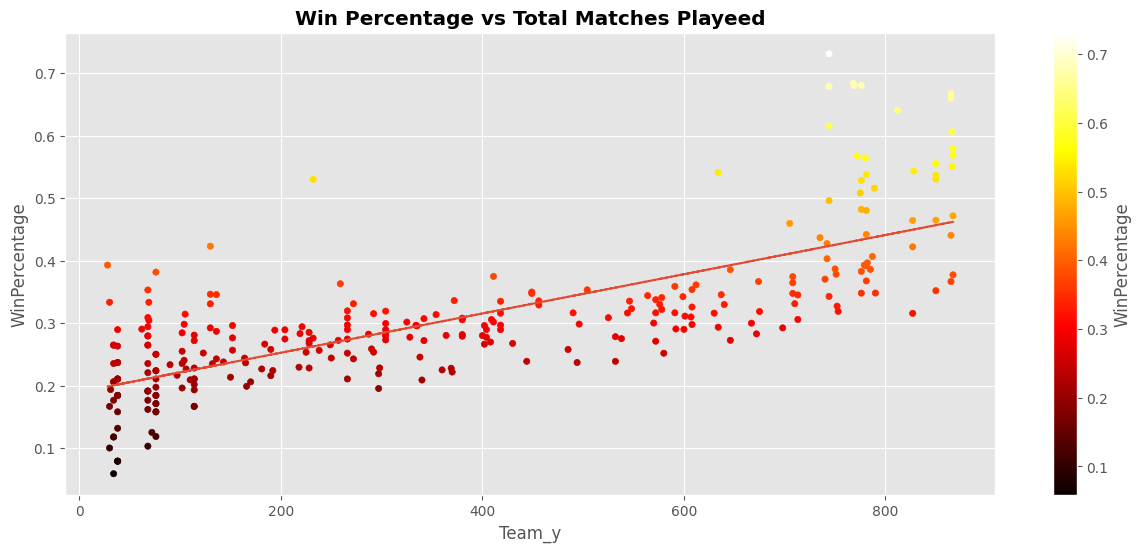

In [11]:
merged.plot.scatter(figsize=(15,6),x='Team_y',y='WinPercentage',c='WinPercentage',cmap='hot')
plt.title('Win Percentage vs Total Matches Playeed',fontweight='bold')

z=np.polyfit(merged['Team_y'],merged['WinPercentage'],1)
p = np.poly1d(z)
plt.plot(merged['Team_y'], p(merged['Team_y']),ls='-.')

plt.show()

# win percentage increases as number of total matches increases

### Longest Win Streaks in European Leagues 

In [21]:
win=df['GF']>df['GA']

streaks=(win[win]
 .groupby([df['Team'], (~win).cumsum()])
 .size()
 .groupby(level='Team').max()
)

streaks.sort_values(ascending=False).head(15)

Team
Bayern Munich      19
Manchester City    18
Liverpool          18
Inter              17
Benfica            16
Barcelona          16
Porto              16
Juventus           15
Paris S-G          14
Ajax               14
Braga              13
Feyenoord          13
Arsenal            13
PSV Eindhoven      13
Chelsea            13
dtype: int64

In [24]:
#or
df.sort_values(['Comp','Team','Date']).reset_index(drop=True)\
.query('Result!="W"').groupby(['Comp','Team'])['Result'].apply(lambda x:(pd.Series(x.index)-(pd.Series(x.index).shift(1)+1)))\
.reset_index().groupby(['Comp','Team'])['Result'].max().sort_values(ascending=False).head(15).astype(int)

Comp            Team           
Bundesliga      Bayern Munich      19
Premier League  Liverpool          18
                Manchester City    18
Serie A         Inter              17
Primeira Liga   Benfica            16
La Liga         Barcelona          16
Ligue 1         Monaco             16
La Liga         Real Madrid        16
Primeira Liga   Porto              16
Serie A         Juventus           15
Ligue 1         Bordeaux           14
Eredivisie      Ajax               14
Premier League  Arsenal            14
Ligue 1         Paris S-G          14
Eredivisie      Feyenoord          13
Name: Result, dtype: int32

### How Many Goals are Scored and Conceded by Teams on AVG per Season?  

In [15]:
df['CumGF']=df.groupby(['Comp','Season','Team'])['GF'].cumsum()
df['CumGA']=df.groupby(['Comp','Season','Team'])['GA'].cumsum()
df['CumMatches']=df.groupby(['Comp','Season','Team'])['Date'].cumcount()+1

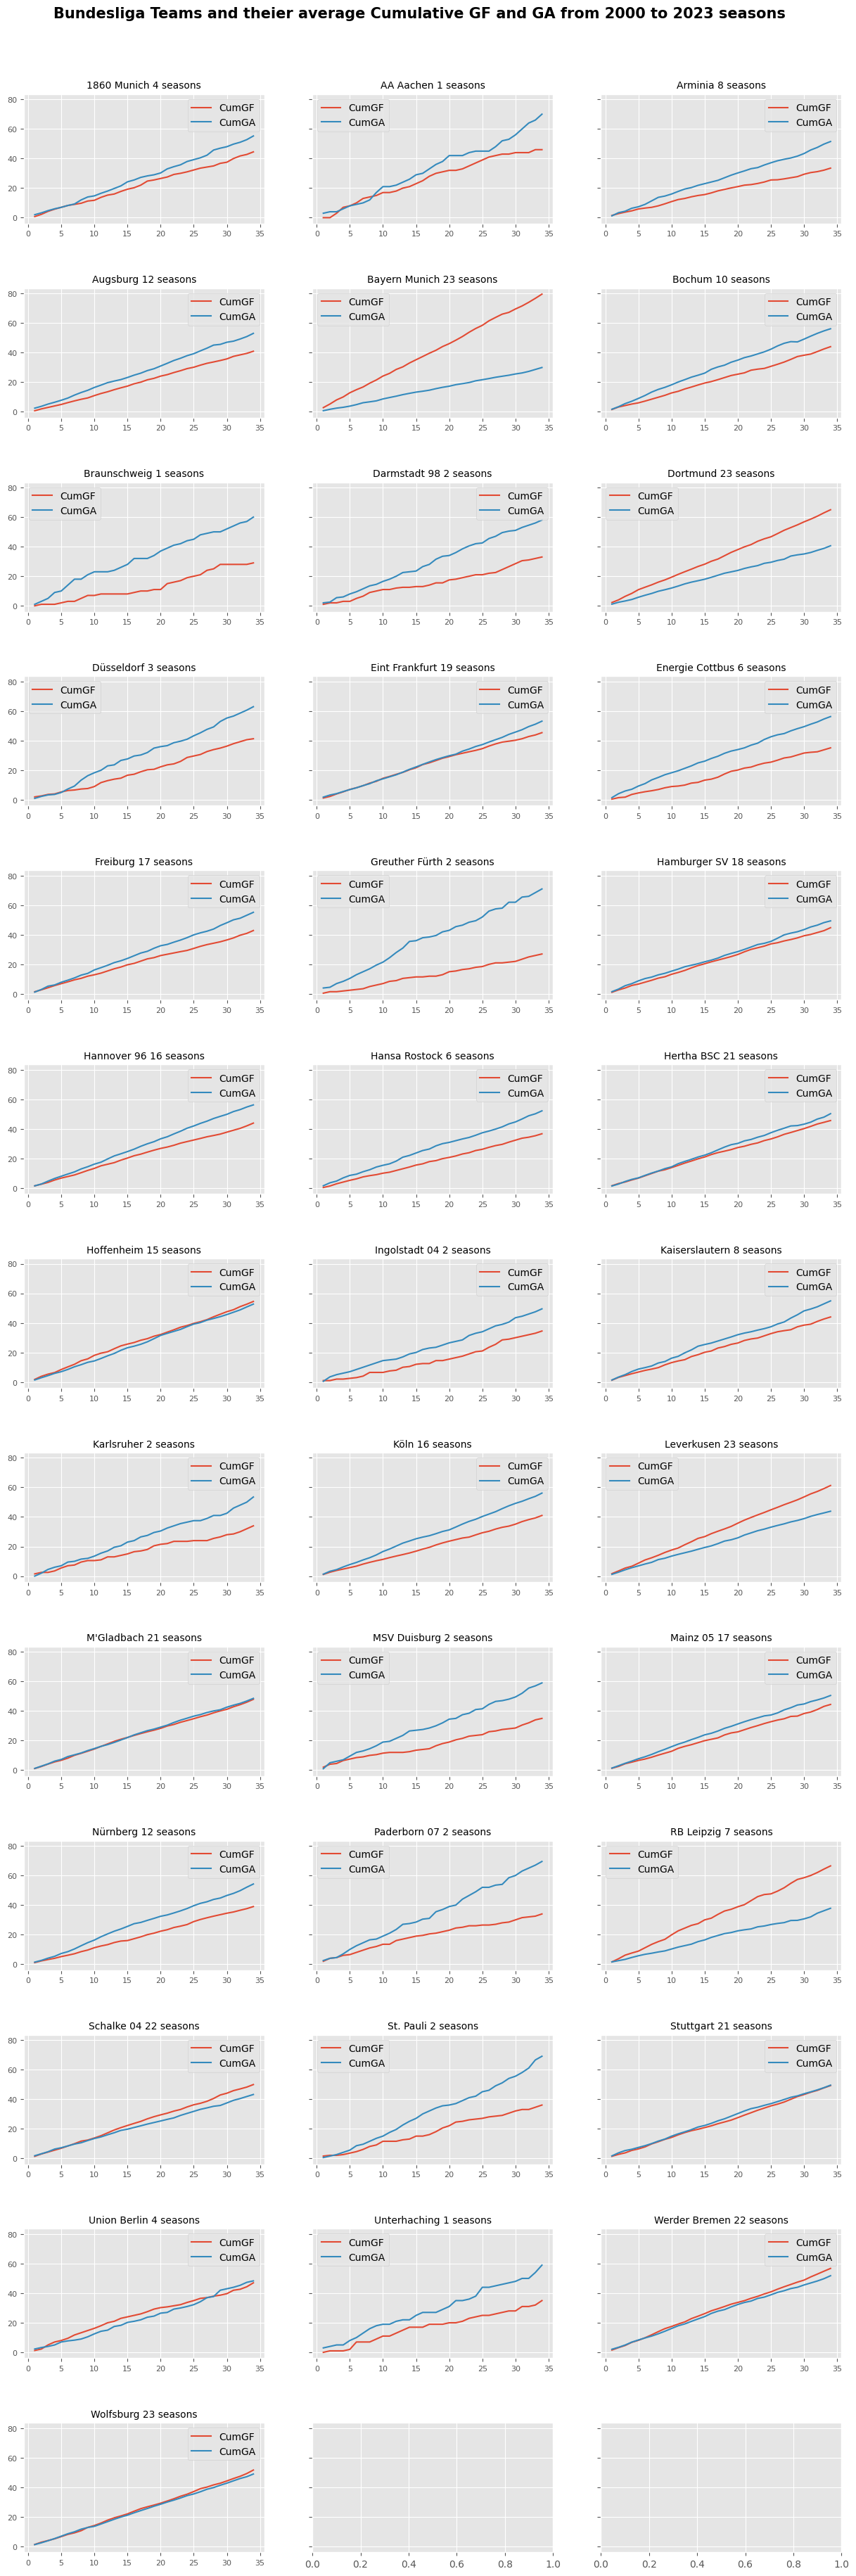

In [16]:
def chart(dataframe,league):
    df=dataframe[dataframe['Comp']==league]
    for comp in df['Comp'].unique():
        rows=math.ceil(df.query('Comp==@comp')['Team'].nunique()/3)
        fig,axes=plt.subplots(rows,3,figsize=(15,rows*3.2),sharey=True)

        for i,team in enumerate(sorted(df.query('Comp==@comp')['Team'].unique())):
            filtered=df.query('Comp==@comp and Team==@team').groupby('CumMatches').agg({'CumGF':'mean','CumGA':'mean','Season':'count'}).reset_index()
            ax=axes.ravel()[i]
            filtered.plot(ax=ax,kind='line',x='CumMatches',y=['CumGF','CumGA'],fontsize=8,xlabel='')
            ax.set_title(f'{team} {filtered["Season"].max()} seasons',size=10)
        plt.suptitle(f'{comp} Teams and theier average Cumulative GF and GA from 2000 to 2023 seasons',size=15,fontweight='bold')
        plt.subplots_adjust(hspace=0.5,top=0.95)
        plt.show()
        print('\n\n')
        
chart(df,'Bundesliga')

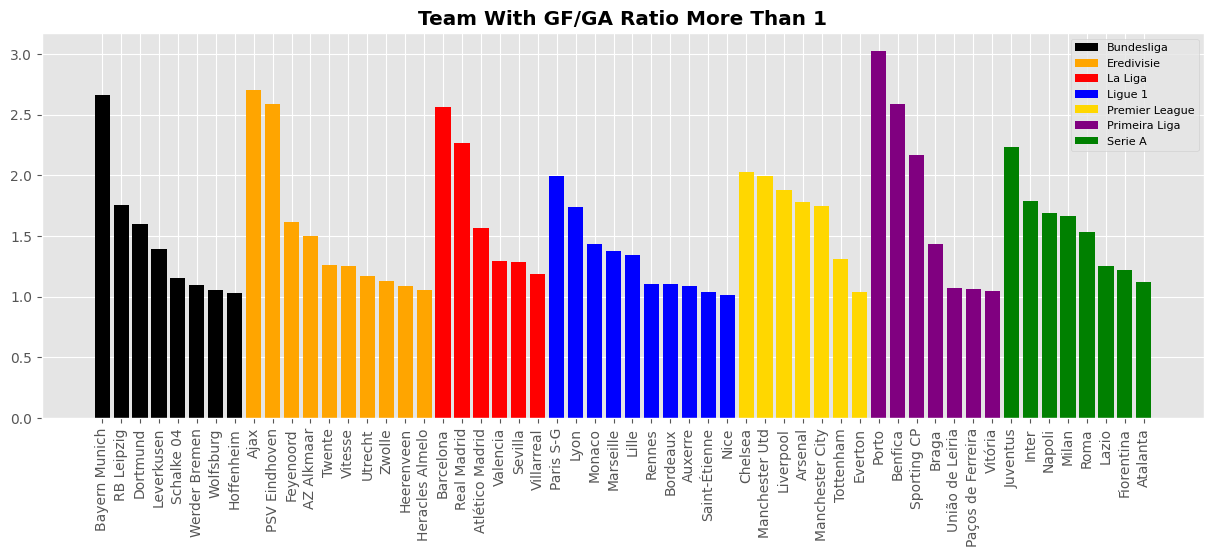

,Comp,Team,CumMatches,CumGF,CumGA,Season,Ratio
0,Bundesliga,Bayern Munich,34,79.545455,29.909091,22,2.659574
1,Bundesliga,RB Leipzig,34,66.500000,37.833333,6,1.757709
2,Bundesliga,Dortmund,34,64.954545,40.590909,22,1.600224
3,Bundesliga,Leverkusen,34,61.272727,43.863636,22,1.396891
4,Bundesliga,Schalke 04,34,49.857143,43.142857,21,1.155629
5,Bundesliga,Werder Bremen,34,56.761905,51.809524,21,1.095588
6,Bundesliga,Wolfsburg,34,51.636364,48.954545,22,1.054782
7,Bundesliga,Hoffenheim,34,54.500000,52.714286,14,1.033875
8,Eredivisie,Ajax,34,85.000000,31.428571,21,2.704545
9,Eredivisie,PSV Eindhoven,34,80.666667,31.142857,21,2.590214


In [17]:
grouped=df.groupby(['Comp','Team','CumMatches']).agg({'CumGF':'mean','CumGA':'mean','Season':'count'}).reset_index()\
.sort_values(['Comp','Team','CumMatches'],ascending=[True,True,False])\
.groupby(['Comp','Team']).head(1)
grouped['Ratio']=grouped['CumGF']/grouped['CumGA']

data=grouped[grouped['Ratio']>1].sort_values(['Comp','Ratio'],ascending=[True,False]).reset_index(drop=True)

plt.figure(figsize=(15,5))
for comp,color in zip(data['Comp'].unique(),['black','orange','red','blue','gold','purple','green']):
    filt=data[data['Comp']==comp]
    plt.bar(filt['Team'],filt['Ratio'],color=color,label=comp)
    plt.xticks(rotation=90)
plt.title('Team With GF/GA Ratio More Than 1',fontweight='bold')
plt.legend(bbox_to_anchor=(1,1),fontsize=8)
plt.show()

data.style.background_gradient(subset='Ratio',cmap='Reds')

### For Each League Find 5 Teams with the Best Median Rank from 2000 to 2023 Season 

In [18]:
ranks=df.groupby(['Season','Comp','Team']).head(1)[['Season','Comp','Team']]
ranks['Rank']=ranks.groupby(['Season','Comp'])['Team'].cumcount()+1
ranks=ranks.groupby(['Comp','Team'])['Rank'].median().reset_index()
ranks=ranks.sort_values(['Comp','Rank'])
ranks.groupby('Comp').head(5)

,Comp,Team,Rank
4,Bundesliga,Bayern Munich,1.0
8,Bundesliga,Dortmund,3.0
29,Bundesliga,RB Leipzig,3.0
23,Bundesliga,Leverkusen,5.0
30,Bundesliga,Schalke 04,5.0
39,Eredivisie,Ajax,2.0
54,Eredivisie,PSV Eindhoven,2.0
46,Eredivisie,Feyenoord,3.0
38,Eredivisie,AZ Alkmaar,4.0
59,Eredivisie,Twente,6.5


### Which Team Has The Best Win Percentage Against Which Team In Its League 

In [19]:
matches=df.groupby(['Comp','Team','Opponent'])['Date'].count().reset_index()
wins=df[df['Result']=='W'].groupby(['Comp','Team','Opponent'])['Date'].count().reset_index()
merged=wins.merge(matches,on=['Comp','Team','Opponent']).rename(columns={'Date_x':'Wins','Date_y':'Matches'})
merged['WinPercentage']=merged['Wins']/merged['Matches']

merged[merged['Matches']>20].sort_values(['Comp','Team','WinPercentage'],ascending=[True,True,False])\
.groupby(['Comp','Team']).head(1)

,Comp,Team,Opponent,Wins,Matches,WinPercentage
77,Bundesliga,Augsburg,Werder Bremen,12,22,0.545455
90,Bundesliga,Bayern Munich,Freiburg,27,34,0.794118
175,Bundesliga,Dortmund,Freiburg,24,34,0.705882
231,Bundesliga,Eint Frankfurt,Hannover 96,10,26,0.384615
279,Bundesliga,Freiburg,Augsburg,11,22,0.500000
...,...,...,...,...,...,...
7092,Serie A,Parma,Udinese,15,34,0.441176
7181,Serie A,Roma,Empoli,17,22,0.772727
7257,Serie A,Sampdoria,Genoa,13,28,0.464286
7370,Serie A,Torino,Chievo,10,22,0.454545


### Which Formation Works Best Against Which 

In [20]:
merged=df.merge(df[['Date','Team','Formation']], left_on=['Date','Opponent'],right_on=['Date','Team'])

merged1=merged.query('GF>GA').groupby(['Formation_x','Formation_y'])['Date'].count().reset_index(name='Wins')
merged2=merged.groupby(['Formation_x','Formation_y'])['Date'].count().reset_index(name='TotalMatches')

merged=merged1.merge(merged2[['Formation_x','Formation_y','TotalMatches']],on=['Formation_x','Formation_y'])

merged['WinPercentage']=merged['Wins']/merged['TotalMatches']
merged['WinPercentage']=merged['WinPercentage'].apply(lambda x:'{:.0%}'.format(x))

merged.query('TotalMatches>20').sort_values(['Formation_x','Wins'],ascending=[True,False]).groupby('Formation_x').head(1).reset_index(drop=True)

,Formation_x,Formation_y,Wins,TotalMatches,WinPercentage
0,3-1-4-2,4-2-3-1,54,157,34%
1,3-4-1-2,4-3-3,84,246,34%
2,3-4-3,4-2-3-1,254,710,36%
3,3-5-1-1,4-3-3,43,140,31%
4,3-5-2,4-2-3-1,162,518,31%
5,4-1-2-1-2◆,4-2-3-1,295,734,40%
6,4-1-3-2,4-3-3,25,54,46%
7,4-1-4-1,4-2-3-1,357,1130,32%
8,4-2-2-2,4-2-3-1,54,114,47%
9,4-2-3-1,4-2-3-1,2724,7260,38%
